In [1]:
!pip install googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader

In [2]:
GoogleDriveDownloader.download_file_from_google_drive(file_id='1tU_MRukrg3D2iZFZ-tk4oj6MfV4o7q4u',
                                                      dest_path='./rilevazioni.csv', overwrite=True)

In [0]:
import os
import requests
import pandas as pd
import random
import numpy as np

In [4]:
rilevazioni = pd.read_csv('rilevazioni.csv').set_index(['Regione','Citta'])
rilevazioni.iloc[:,-10:]

10-04  11-04  12-04  ...  17-04  18-04  19-04
Regione   Citta                                 ...                     
LOMBARDIA BERGAMO          10151  10258  10309  ...  10590  10629  10689
          BRESCIA          10369  10599  10868  ...  11567  11758  11946
          COMO              1686   1825   1924  ...   2285   2439   2488
          CREMONA           4562   4658   4721  ...   5313   5407   5417
          LECCO             1838   1860   1881  ...   2005   2030   2072
...                          ...    ...    ...  ...    ...    ...    ...
CALABRIA  COSENZA            289    291    291  ...    367    385    407
          REGGIO CALABRIA    256    260    263  ...    240    240    241
          CATANZARO          176    181    182  ...    195    197    197
          VIBO VALENTIA       65     68     68  ...     70     70     71
          CROTONE            113    113    117  ...    117    117    117

[108 rows x 10 columns]

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

def plot_annotate(df, title='', xdelta=0, ydelta=10, figsize=(17, 7)):
  
  ax = df.T.plot(figsize=figsize, title=title)
  ax.set_xticks(ticks=np.arange(0, len(df.columns) , step=2))
  tick_label = list(df.columns)[::2]
  ax.set_xticklabels(tick_label)

  for k, v in zip(np.arange(len(df.columns)), df.T.iterrows()):
    for el in v[1]:
      ax.annotate(el, (k + xdelta, el + ydelta))
  return ax

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
sorted_by_infections = rilevazioni.loc[rilevazioni.sort_values(by=[rilevazioni.columns[-1]],ascending=False).index]

In [0]:
crescita = pd.DataFrame(index=sorted_by_infections.index)

In [0]:
for ieri, oggi in zip(sorted_by_infections.columns[:-1], sorted_by_infections.columns[1:]):
  crescita[oggi] = sorted_by_infections[oggi] - sorted_by_infections[ieri]

In [9]:
display(crescita.head(3))
sorted_by_infections.head(3)

09-03  10-03  11-03  12-03  ...  16-04  17-04  18-04  19-04
Regione   Citta                                ...                            
LOMBARDIA MILANO     100     86    333    221  ...    277    325    269    279
          BRESCIA    238     51    561    247  ...    168    212    191    188
          BERGAMO    248    227    343    321  ...     46     72     39     60

[3 rows x 42 columns]

08-03  09-03  10-03  11-03  ...  16-04  17-04  18-04  19-04
Regione   Citta                                ...                            
LOMBARDIA MILANO     406    506    592    925  ...  14952  15277  15546  15825
          BRESCIA    501    739    790   1351  ...  11355  11567  11758  11946
          BERGAMO    997   1245   1472   1815  ...  10518  10590  10629  10689

[3 rows x 43 columns]

In [0]:
crescita_italia = crescita.sum().to_frame().T
crescita_italia.index = ['Italia']

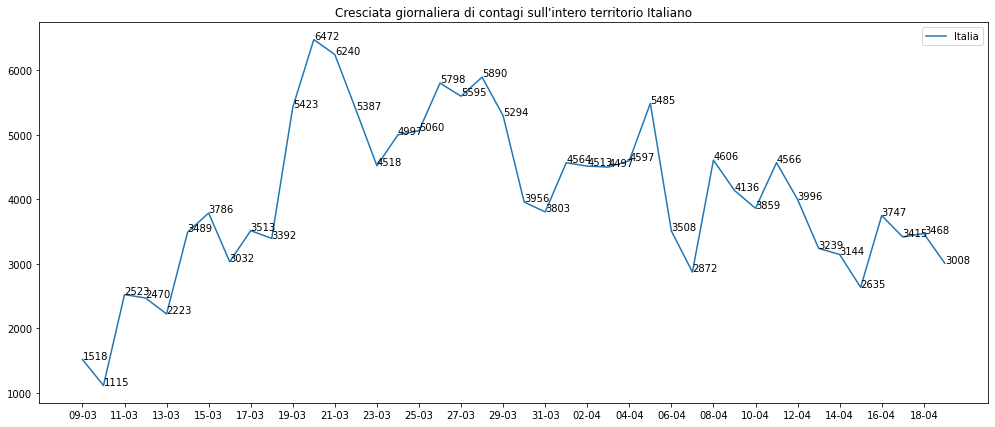

In [11]:
_ = plot_annotate(crescita_italia, 'Cresciata giornaliera di contagi sull\'intero territorio Italiano')

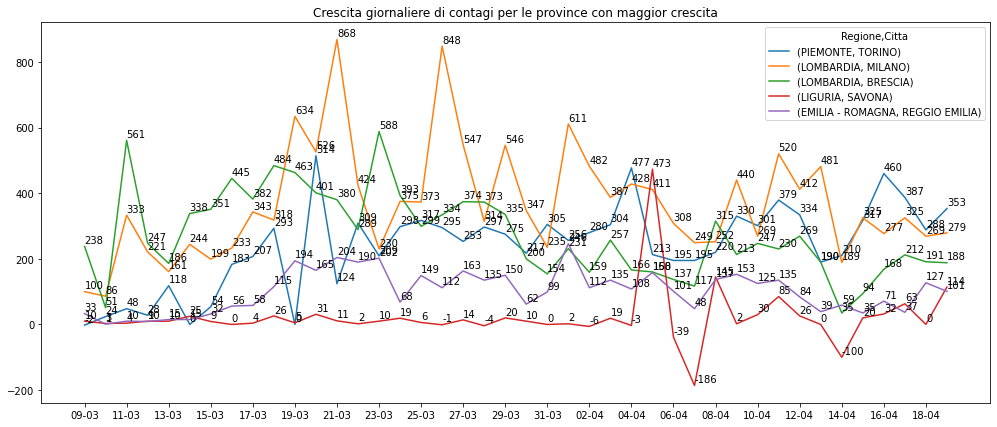

In [24]:
ax = plot_annotate(crescita.sort_values(by=crescita.columns[-1], ascending=False).head(5),
                   'Crescita giornaliere di contagi per le province con maggior crescita')
#_ = ax.set_ylim(-111,ax.get_ylim()[1])

# Average 3 days

In [0]:
avg3 = pd.DataFrame(index=crescita.sort_values(by=crescita.columns[-1], ascending=False).index)
for meno2,ieri, oggi in zip(crescita.columns[:-2], crescita.columns[1:-1], crescita.columns[2:]):
  avg3[oggi] = pd.concat([crescita[oggi], crescita[ieri], crescita[meno2]], axis=1).mean(axis=1)

In [0]:
avg3 = avg3.astype('int32')

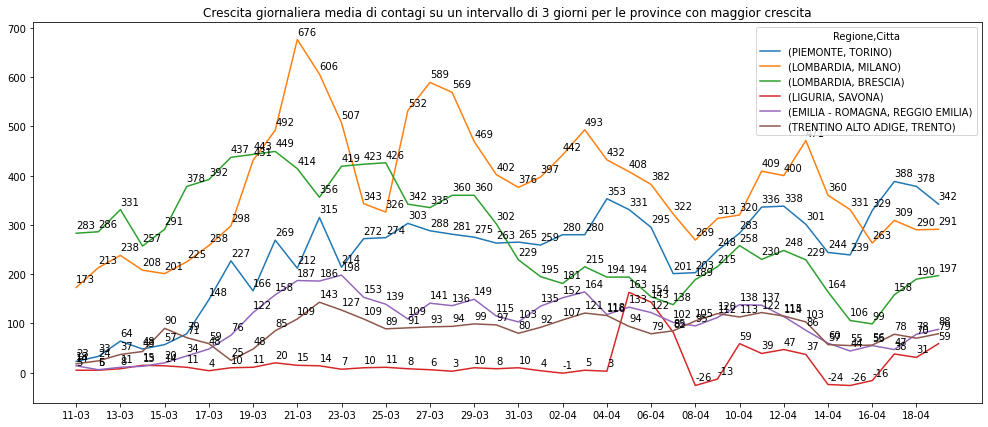

In [15]:
_ = plot_annotate(avg3.head(6), 'Crescita giornaliera media di contagi su un intervallo di 3 giorni per le province con maggior crescita')

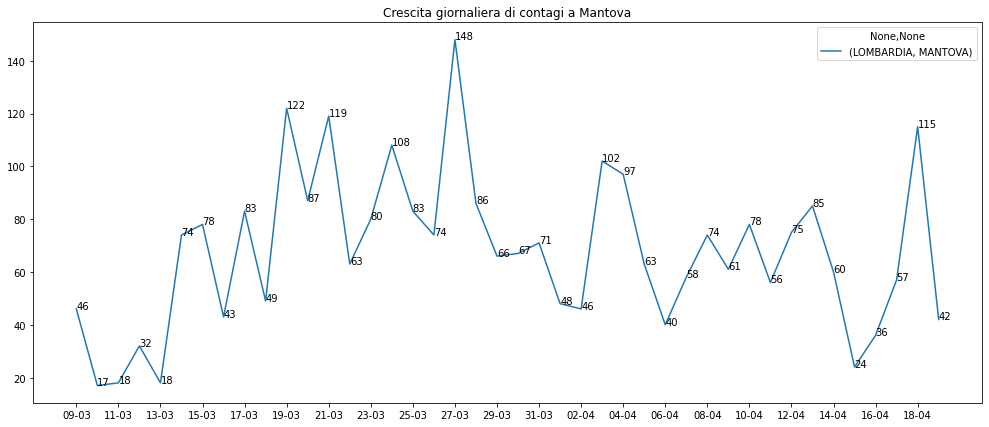

In [16]:
_ = plot_annotate(crescita.loc[('LOMBARDIA','MANTOVA')].to_frame().T, 'Crescita giornaliera di contagi a Mantova', ydelta=0)

In [0]:
regioni = sorted_by_infections.groupby('Regione').sum()
regioni = regioni.sort_values(by=[regioni.columns[-1]],ascending=False)

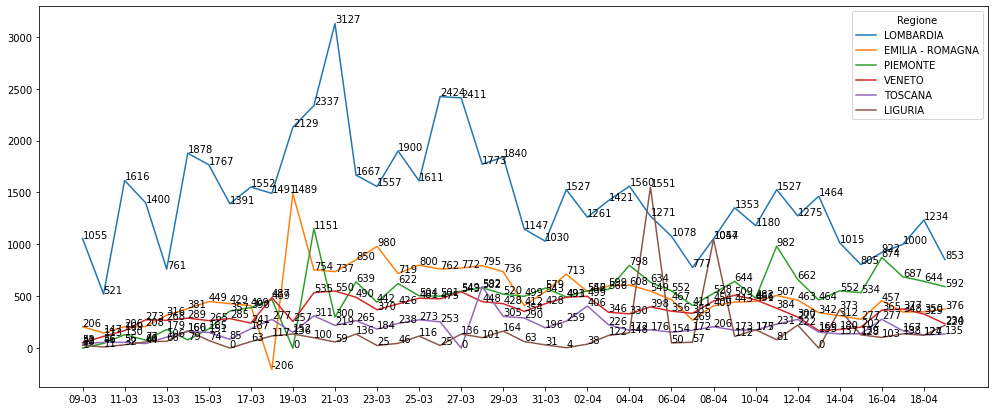

In [18]:
crescita_regioni = crescita.groupby('Regione').sum().loc[regioni.index]
_ = plot_annotate(crescita_regioni.head(6))


In [0]:
casi_italia = sorted_by_infections.sum(axis=0).to_frame().T
casi_italia.index= ['Italia']

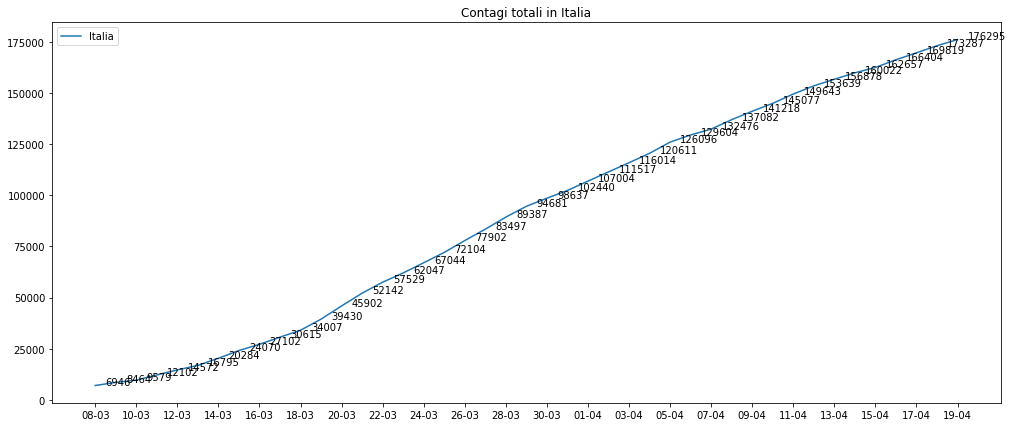

In [20]:
_ = plot_annotate(casi_italia, 'Contagi totali in Italia', xdelta=0.5)

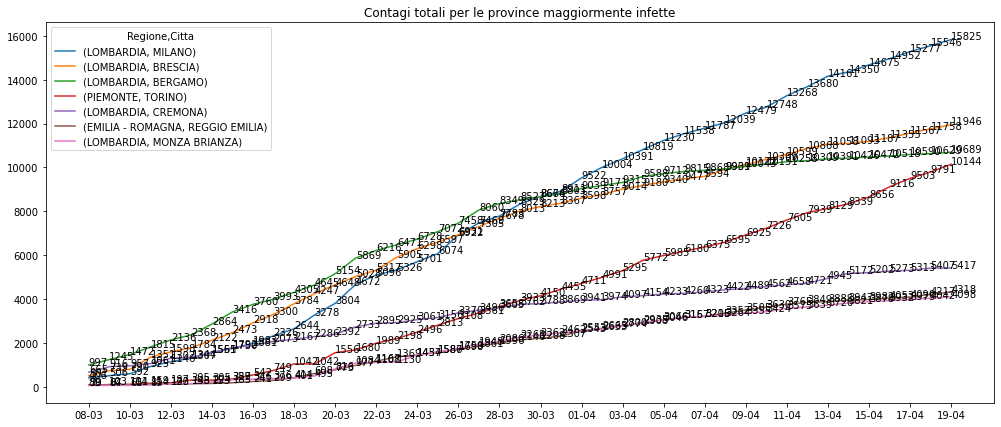

In [21]:
_ = plot_annotate(sorted_by_infections.head(7),'Contagi totali per le province maggiormente infette')

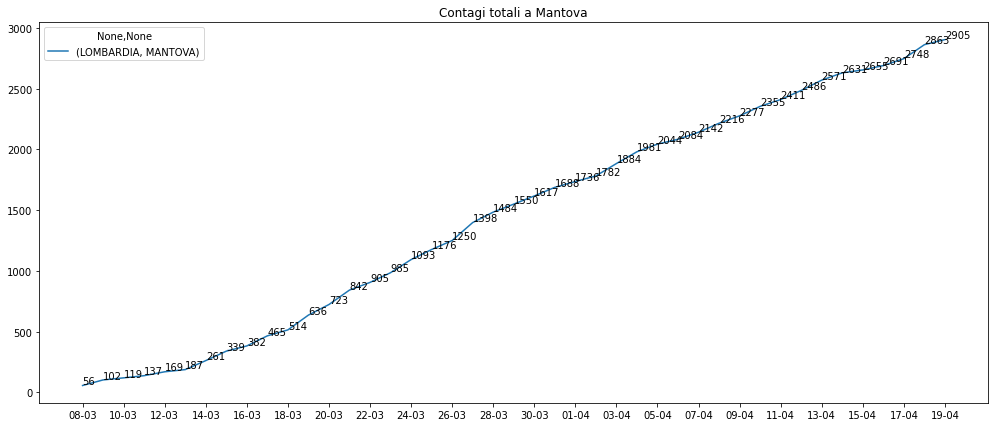

In [22]:
_ = plot_annotate(sorted_by_infections.loc[('LOMBARDIA','MANTOVA')].to_frame().T, 'Contagi totali a Mantova')

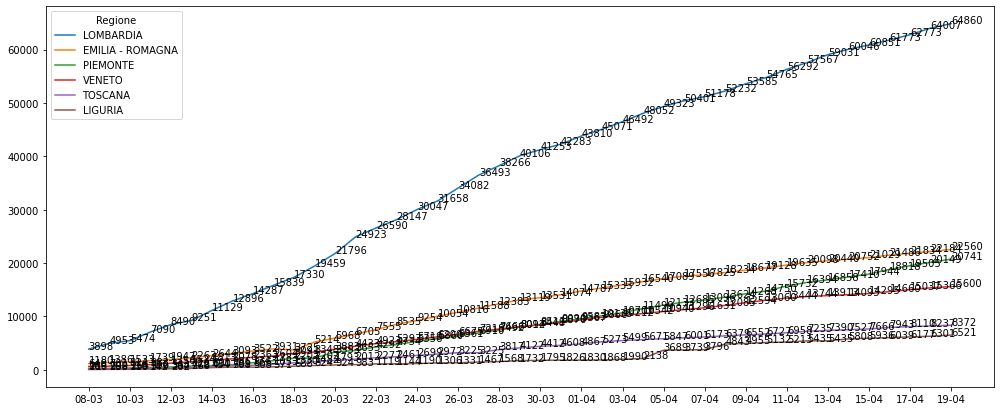

In [23]:
_ = plot_annotate(regioni.head(6))